# Prosper Loan Data Exploration

### by Omotayo Adeniran

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

Prosper Marketplace is America's first peer-to-peer lending marketplace, with over $\$$7 billion in funded loans. Borrowers request personal loans on Prosper and investors (individual or institutional) can fund anywhere from $\$$2,000 to $\$$40,000 per loan request. Investors can consider borrowers’ credit scores, ratings, and histories and the category of the loan. Prosper handles the servicing of the loan and collects and distributes borrower payments and interest back to the loan investors.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# set the max columns to none
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# loading data and its dictionary for description
df= pd.read_csv('prosperLoanData.csv')
df_dict = pd.read_csv('prosperloan_dict.csv')

In [3]:
# checking structure of the dataset
df.shape

(113937, 81)

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [5]:
# Understanding the variables
df_dict

,Variable,Description
0,ListingKey,"Unique key for each listing, same value as the..."
1,ListingNumber,The number that uniquely identifies the listin...
2,ListingCreationDate,The date the listing was created.
3,CreditGrade,The Credit rating that was assigned at the tim...
4,Term,The length of the loan expressed in months.
5,LoanStatus,"The current status of the loan: Cancelled, Cha..."
6,ClosedDate,"Closed date is applicable for Cancelled, Compl..."
7,BorrowerAPR,The Borrower's Annual Percentage Rate (APR) fo...
8,BorrowerRate,The Borrower's interest rate for this loan.
9,LenderYield,The Lender yield on the loan. Lender yield is ...


In [6]:
# Selecting the variable of interest for this analysis. 
# This was preselected on Excel after careful examination and investigation of each variables 
selected = ['ListingNumber',
'ListingCreationDate',
'Term',
'LoanStatus',
'BorrowerAPR',
'BorrowerRate',
'LenderYield',
'ProsperRating (Alpha)',
'ProsperScore',
'ListingCategory (numeric)',
'BorrowerState',
'EmploymentStatus',
'EmploymentStatusDuration',
'IsBorrowerHomeowner',
'CreditScoreRangeLower',
'CreditScoreRangeUpper',
'InquiriesLast6Months',
'TotalInquiries',
'CurrentDelinquencies',
'AmountDelinquent',
'DelinquenciesLast7Years',
'DebtToIncomeRatio',
'IncomeRange',
'StatedMonthlyIncome',
'TotalProsperLoans',
'ProsperPrincipalBorrowed',
'ProsperPrincipalOutstanding',
'LoanCurrentDaysDelinquent',
'LoanFirstDefaultedCycleNumber',
'LoanMonthsSinceOrigination',
'LoanOriginalAmount',
'LoanOriginationDate',
'LoanOriginationQuarter',
'MonthlyLoanPayment'
]

In [7]:
# checking for duplicates
df.ListingNumber.duplicated().sum()

871

In [8]:
# dropping duplicates
df.drop_duplicates(subset=['ListingNumber'], keep='last', inplace = True)

In [9]:
# resetting the index
df.reset_index(inplace = True)

### What is the structure of your dataset?

> This dataset originally has 113,937 records with 81 unique variables. The variables are of different datatypes including categorical, quantitative and others.
### What is/are the main feature(s) of interest in your dataset?

> I'm so  much interested in what factors determines the borrower's rate and also the loan repayment
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I have pre-selected the features I think will help in my analysis and it has been saved in the list named `selected`

In [10]:
# Creating a dataset of just the selected variables
loan = df.loc[:,selected]
loan.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,TotalProsperLoans,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,0,CO,Self-employed,2.0,True,640.0,659.0,3.0,3.0,2.0,472.0,4.0,0.17,"$25,000-49,999",3083.333333,NaN,NaN,NaN,0,NaN,78,9425,2007-09-12 00:00:00,Q3 2007,330.43
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,A,7.0,2,CO,Employed,44.0,False,680.0,699.0,3.0,5.0,0.0,0.0,0.0,0.18,"$50,000-74,999",6125.000000,NaN,NaN,NaN,0,NaN,0,10000,2014-03-03 00:00:00,Q1 2014,318.93
2,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,0,GA,Not available,NaN,False,480.0,499.0,0.0,1.0,1.0,NaN,0.0,0.06,Not displayed,2083.333333,NaN,NaN,NaN,0,NaN,86,3001,2007-01-17 00:00:00,Q1 2007,123.32
3,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,A,9.0,16,GA,Employed,113.0,True,800.0,819.0,0.0,1.0,4.0,10056.0,14.0,0.15,"$25,000-49,999",2875.000000,NaN,NaN,NaN,0,NaN,16,10000,2012-11-01 00:00:00,Q4 2012,321.45
4,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,D,4.0,2,MN,Employed,44.0,True,680.0,699.0,1.0,9.0,0.0,0.0,0.0,0.26,"$100,000+",9583.333333,1.0,11000.0,9947.9,0,NaN,6,15000,2013-09-20 00:00:00,Q3 2013,563.97


In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ListingNumber                  113066 non-null  int64  
 1   ListingCreationDate            113066 non-null  object 
 2   Term                           113066 non-null  int64  
 3   LoanStatus                     113066 non-null  object 
 4   BorrowerAPR                    113041 non-null  float64
 5   BorrowerRate                   113066 non-null  float64
 6   LenderYield                    113066 non-null  float64
 7   ProsperRating (Alpha)          83982 non-null   object 
 8   ProsperScore                   83982 non-null   float64
 9   ListingCategory (numeric)      113066 non-null  int64  
 10  BorrowerState                  107551 non-null  object 
 11  EmploymentStatus               110811 non-null  object 
 12  EmploymentStatusDuration      

In [12]:
# Renaming some columns
loan.rename(columns = {'ProsperRating (Alpha)':'ProsperRating', 'ListingCategory (numeric)':'ListingCategory'}, inplace = True)

In [13]:
# converting columns names to lower case
loan.columns = loan.columns.str.lower()
# check
loan.columns

Index(['listingnumber', 'listingcreationdate', 'term', 'loanstatus',
       'borrowerapr', 'borrowerrate', 'lenderyield', 'prosperrating',
       'prosperscore', 'listingcategory', 'borrowerstate', 'employmentstatus',
       'employmentstatusduration', 'isborrowerhomeowner',
       'creditscorerangelower', 'creditscorerangeupper',
       'inquirieslast6months', 'totalinquiries', 'currentdelinquencies',
       'amountdelinquent', 'delinquencieslast7years', 'debttoincomeratio',
       'incomerange', 'statedmonthlyincome', 'totalprosperloans',
       'prosperprincipalborrowed', 'prosperprincipaloutstanding',
       'loancurrentdaysdelinquent', 'loanfirstdefaultedcyclenumber',
       'loanmonthssinceorigination', 'loanoriginalamount',
       'loanoriginationdate', 'loanoriginationquarter', 'monthlyloanpayment'],
      dtype='object')

In [14]:
# it will help in our anaysis if we can have the quarters as a standalone column
loan['loanquarter'] = loan['loanoriginationquarter'].str.split(' ', expand= True)[0]
loan.drop(columns='loanoriginationquarter', inplace= True) # drop the combined column

In [15]:
# Convert prosperrating & incomerange to ordered categorical datatype
ordinal_var_dict = {'prosperrating': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],
                    'incomerange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
                 'loanquarter': ['Q1', 'Q2', 'Q3', 'Q4']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)

In [16]:
# Other catergorical datatypes that are not ordered
#selected the categorical variables in a list
cat_var = ['prosperscore',
'listingcategory',
'employmentstatus',
'creditscorerangelower',
'creditscorerangeupper',
'incomerange'
]
for var in cat_var:
    loan[var]= loan[var].astype('category')
    print(var, loan[var].dtype)

prosperscore category
listingcategory category
employmentstatus category
creditscorerangelower category
creditscorerangeupper category
incomerange category


In [17]:
#Adjust Datetime columns
loan['listingcreationdate'] = pd.to_datetime(loan['listingcreationdate']) 
loan['loanoriginationdate'] = pd.to_datetime(loan['loanoriginationdate'])

In [18]:
# As always, ID should always be string datatype.
loan.listingnumber= loan.listingnumber.astype('string')              

In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   listingnumber                  113066 non-null  string        
 1   listingcreationdate            113066 non-null  datetime64[ns]
 2   term                           113066 non-null  int64         
 3   loanstatus                     113066 non-null  object        
 4   borrowerapr                    113041 non-null  float64       
 5   borrowerrate                   113066 non-null  float64       
 6   lenderyield                    113066 non-null  float64       
 7   prosperrating                  83982 non-null   category      
 8   prosperscore                   83982 non-null   category      
 9   listingcategory                113066 non-null  category      
 10  borrowerstate                  107551 non-null  object        
 11  

## Quality Issues addressed
The folowing issues were addressed;
 - Columns with datetime variables were converted to datetime; `listingcreationdate` and `loanoriginationdate`
 - `listingnumber` was converted to string datatype.
 - Categorical variables like `prosperscore`, `listingcategory`, `employmentstatus`, `creditscorerangelower`, `creditscorerangeupper`, `incomerange` were converted to categorical datatype.

# Visualizations

## The Ratings and Score distribution
This will include distribution of `prosperrating`, `prosperscore` and one of the credit score.

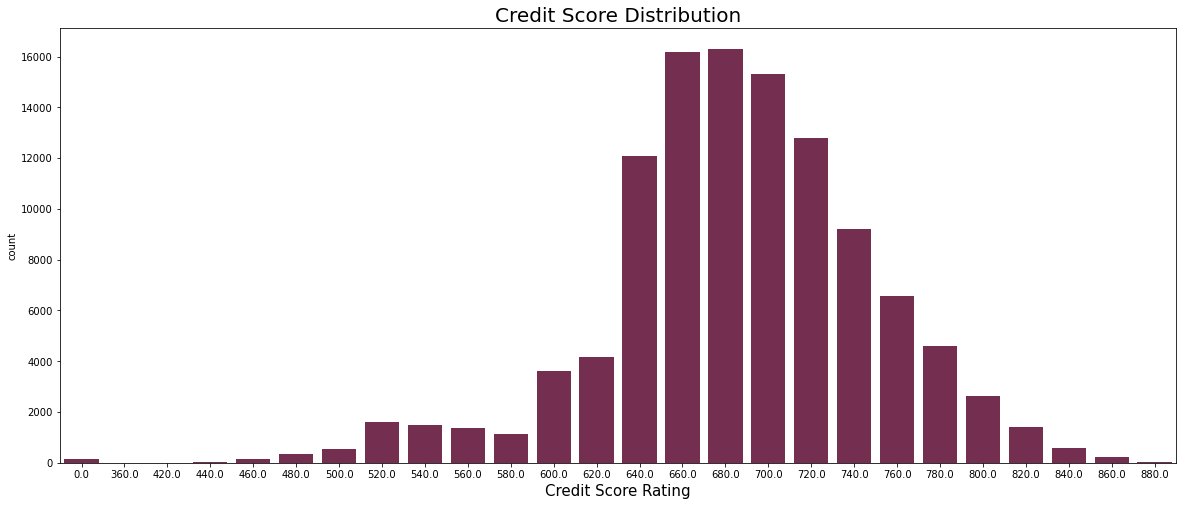

In [21]:
# The credit score distribution
base_color = sb.color_palette(palette= 'twilight_shifted')[5]
plt.figure(figsize = [20, 8])
sb.countplot(data = loan, x= 'creditscorerangelower', color= base_color)
plt.title('Credit Score Distribution', fontdict={'fontsize':20})
plt.xlabel('Credit Score Rating', fontsize=15);

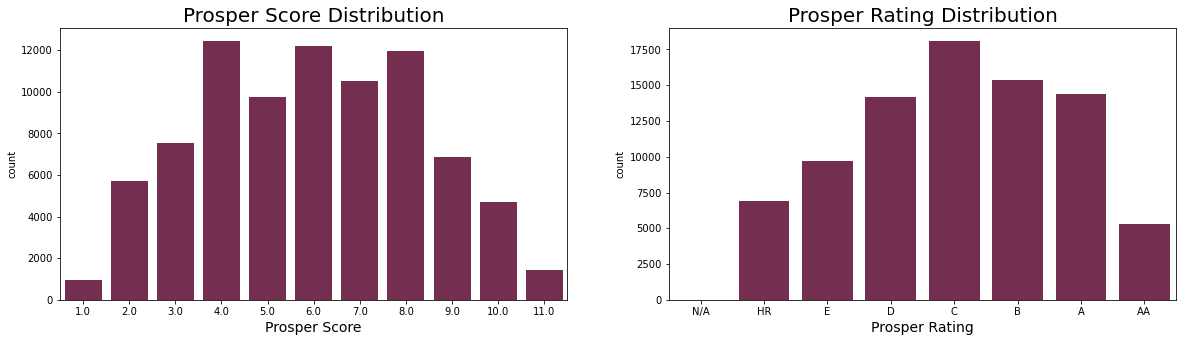

In [22]:
#Prosper Score Distribution (range form 1 to 10)
plt.figure(figsize = [20, 5])
plt.subplot(1,2,1)
sb.countplot(data=loan, x= 'prosperscore', color=base_color)
plt.title('Prosper Score Distribution',fontdict={'fontsize':20})
plt.xlabel('Prosper Score', fontsize=14)

plt.subplot(1,2,2)
sb.countplot(data = loan, x= 'prosperrating', color= base_color)
plt.title('Prosper Rating Distribution', fontdict={'fontsize':20})
plt.xlabel('Prosper Rating', fontsize=14);

### Observation
 - The `credit score`had a slightly left skewed histogram with majority above 640. People also tends to maintain the `680` the most.
 - Both `proper score` and `proper rating` have fairly distributed categories, with score `4.0` having the most people and `C` which is also a score of `4.0` on `the proper rating`.

## The most sought terms of loan, Employment Status, Borrowing rate & Loan amount

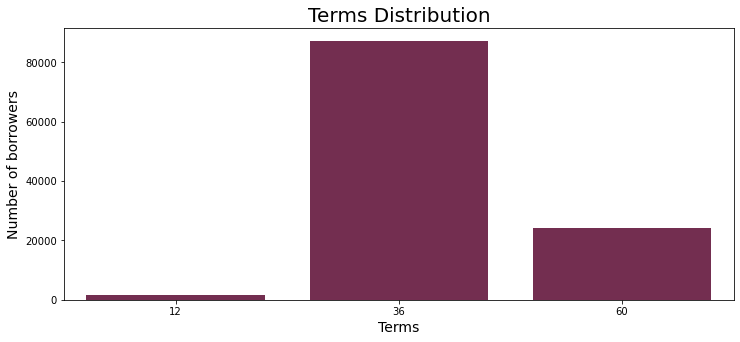

In [102]:
# The most sought term of loan
plt.figure(figsize = [12, 5])
sb.countplot(data=loan, x= 'term', color=base_color)
plt.title('Terms Distribution',fontdict={'fontsize':20})
plt.xlabel('Terms', fontsize=14)
plt.ylabel('Number of borrowers', fontsize=14);

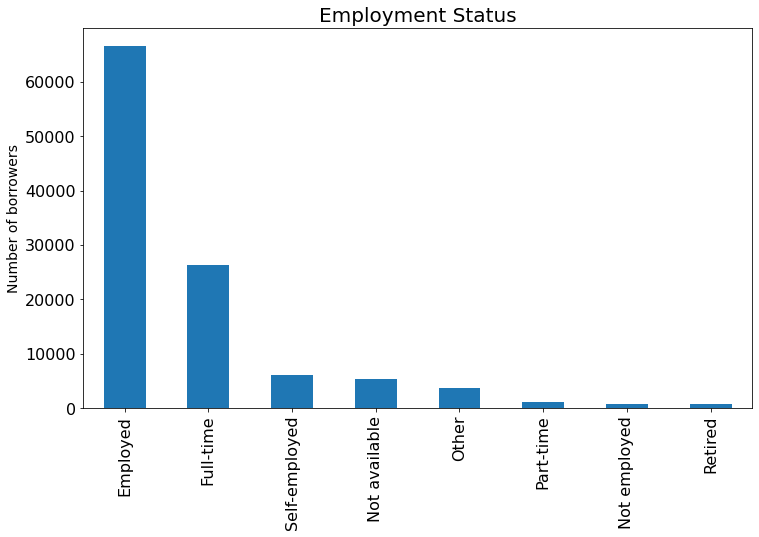

In [24]:
# Employment Status
plt.figure(figsize = [12, 7])
# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.title('Employment Status',fontdict={'fontsize':20})
plt.ylabel('Number of borrowers', fontsize=14)
loan.employmentstatus.value_counts().plot(kind='bar' );

In [25]:
loan.borrowerapr.describe()

count    113041.000000
mean          0.218980
std           0.080483
min           0.006530
25%           0.156290
50%           0.209840
75%           0.283860
max           0.512290
Name: borrowerapr, dtype: float64

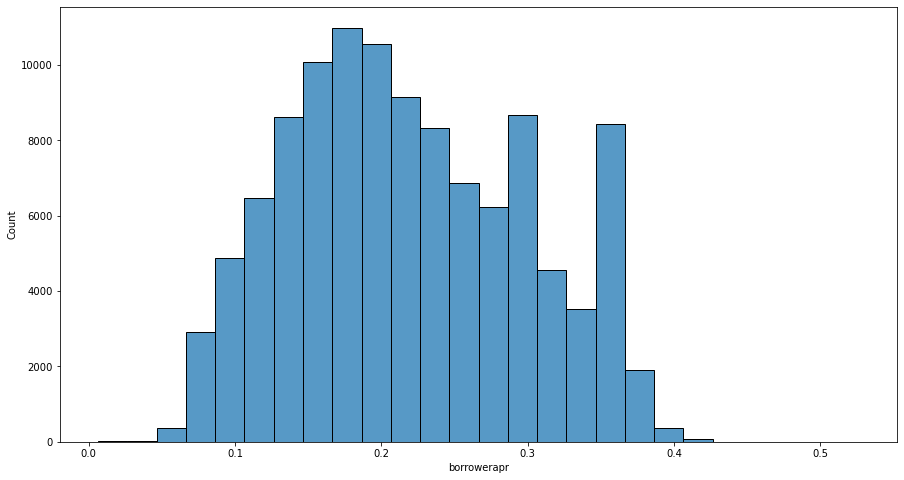

In [26]:
# The borrower's rate distribution
plt.figure(figsize = [15, 8])
bins = np.arange(loan['borrowerapr'].min(),loan['borrowerapr'].max()+0.02,0.02)
sb.histplot(loan['borrowerapr'], bins = bins);

In [27]:
loan.loanoriginalamount.describe()

count    113066.000000
mean       8314.762307
std        6237.007841
min        1000.000000
25%        4000.000000
50%        6300.000000
75%       12000.000000
max       35000.000000
Name: loanoriginalamount, dtype: float64

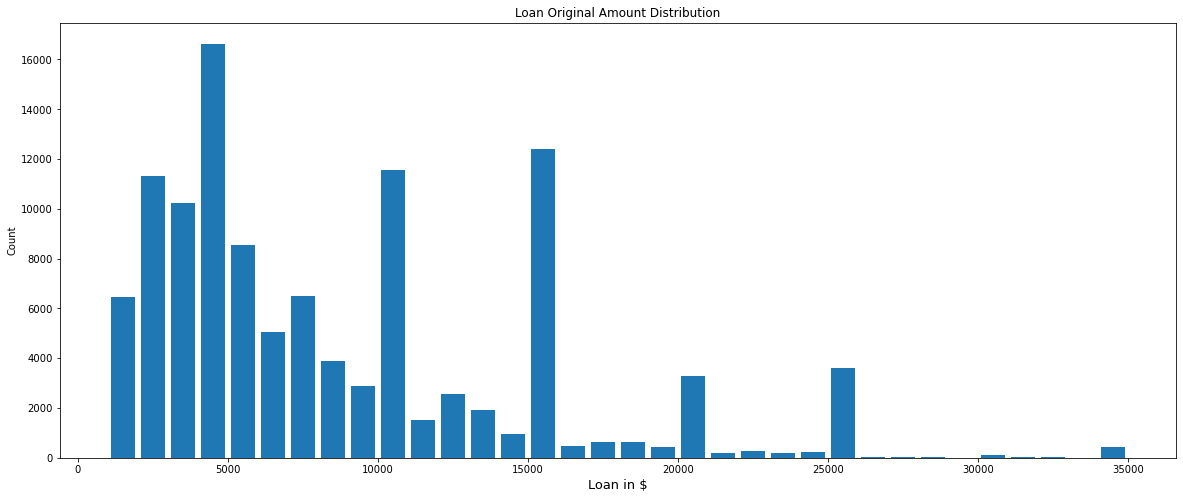

In [28]:
# Loan Original Amount Distribution
binsize = 1000
bins = np.arange(loan['loanoriginalamount'].min(), loan['loanoriginalamount'].max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.hist(data = loan, x = 'loanoriginalamount', bins = bins, rwidth= .8)
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan in $', fontsize= 13)
plt.ylabel('Count')
plt.show()

In [29]:
# Putting Loan Original Amount in a log-scale
log_binsize = 0.1
bins = 10 ** np.arange(3, np.log10(loan['loanoriginalamount'].max())+log_binsize, log_binsize)
bins

array([ 1000.        ,  1258.92541179,  1584.89319246,  1995.26231497,
        2511.88643151,  3162.27766017,  3981.07170553,  5011.87233627,
        6309.5734448 ,  7943.28234724, 10000.        , 12589.25411794,
       15848.93192461, 19952.62314969, 25118.8643151 , 31622.77660168,
       39810.71705535])

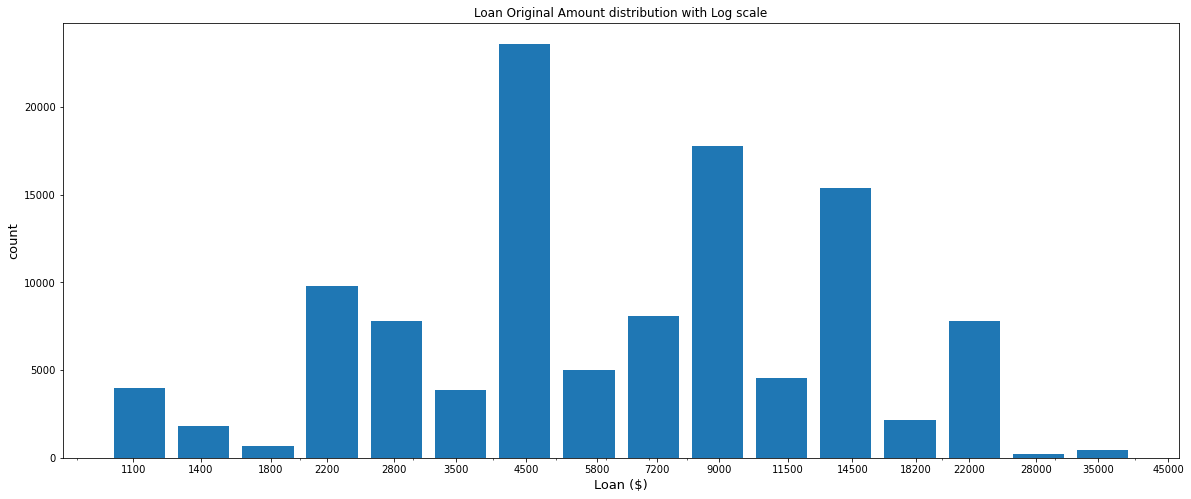

In [30]:
plt.figure(figsize=[20, 8])
plt.hist(data =loan, x = 'loanoriginalamount', bins = bins, rwidth= .8)
plt.title('Loan Original Amount distribution with Log scale')
plt.xscale('log')

# Generate the x-ticks you want to apply
ticks = [ 1100,1400,1800, 2200, 2800,3500, 4500, 5800, 7200, 9000,11500,14500,18200, 22000,28000,35000, 45000]
# Convert ticks into string values, to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

plt.xticks(ticks, labels)
plt.xlabel('Loan ($)', fontsize= 13)
plt.ylabel('count', fontsize= 13)
plt.show()

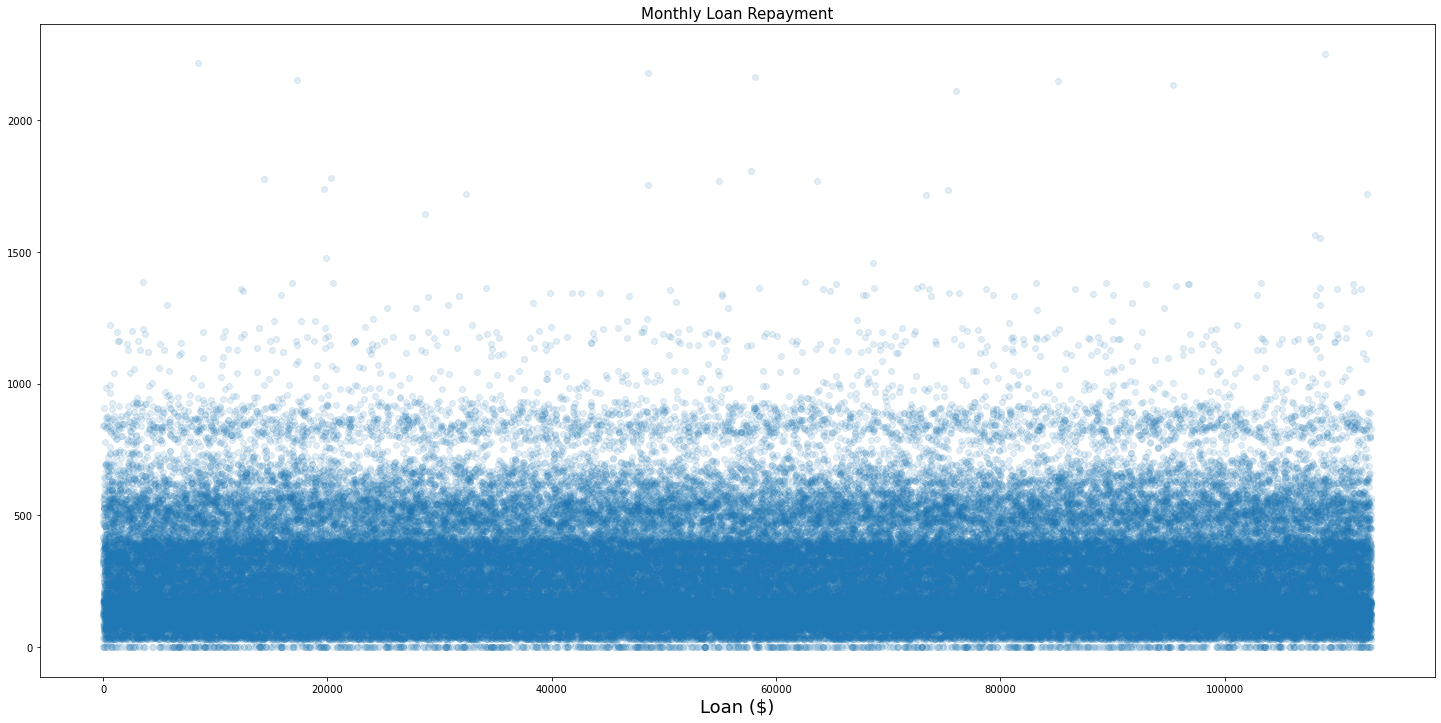

In [31]:
# Looking at the Monthly Loan Repayment concentration
plt.figure(figsize=[25, 12])
plt.scatter(loan.index,loan.monthlyloanpayment, alpha=1/8)
plt.xlabel('Loan ($)', fontsize= 18)
plt.title('Monthly Loan Repayment', fontsize=15)
plt.show()

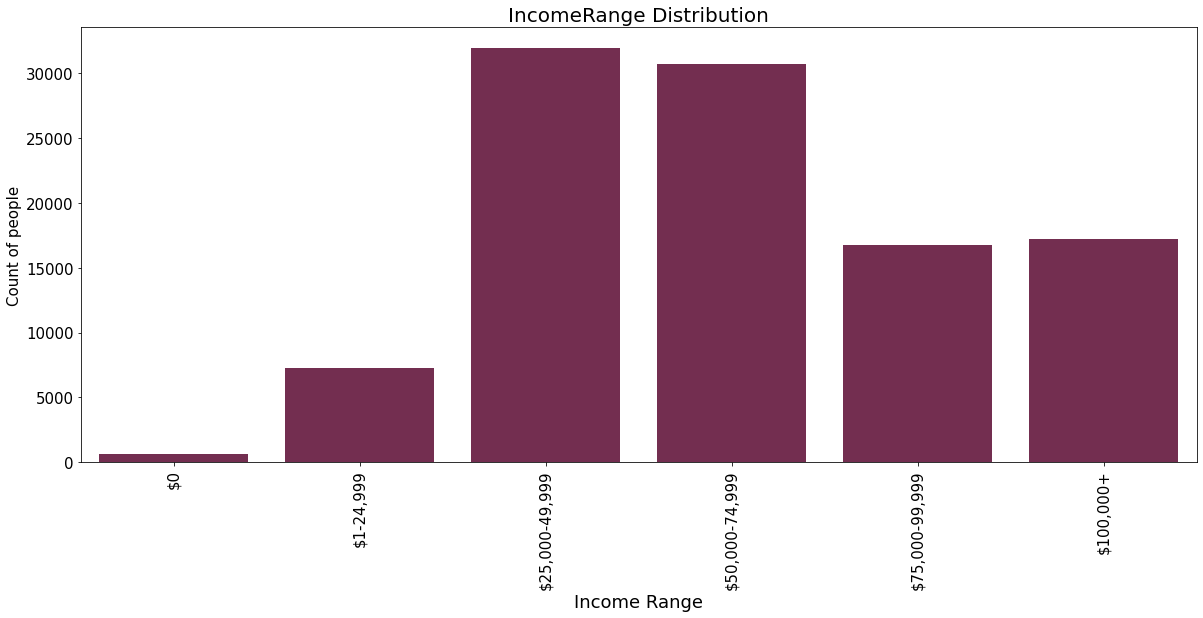

In [32]:
# Income Range distribution
plt.figure(figsize=[20, 8])
base_color = sb.color_palette(palette= 'twilight_shifted')[5]
# order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sb.countplot(data=loan, x='incomerange', color=base_color)
plt.xticks(rotation='90')
plt.title('IncomeRange Distribution',fontdict={'fontsize':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Income Range', fontsize=18)
plt.ylabel('Count of people', fontsize=15);

### Observation
 - The most sought loan term happens to be the `36-month` term with more than 50% of the loans opting for this term.
 - Being employed helps secure loan than any other employment status
 - Loan amount between $\$$ 4500 and $\$$ 6000 are more frequent.
 - The earnings also contributes to getting a loan with $\$$ 25,000 and above having a large amount pf borrowers.

### States residents needing bail-out the most and top reasons for bail-outs

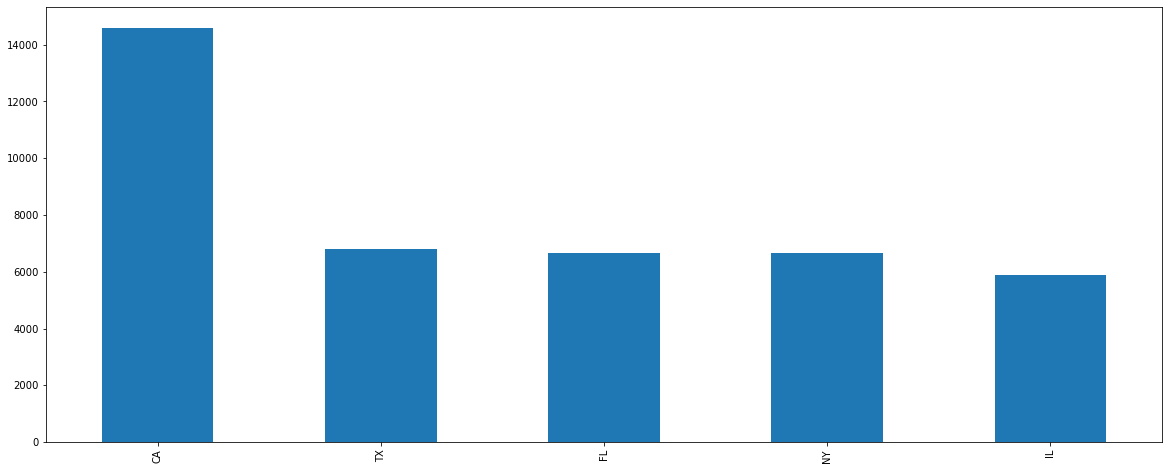

In [33]:
### The Top 10 Borrowing State
plt.figure(figsize=[20, 8])
loan.borrowerstate.value_counts().sort_values(ascending = False).head().plot(kind='bar');   

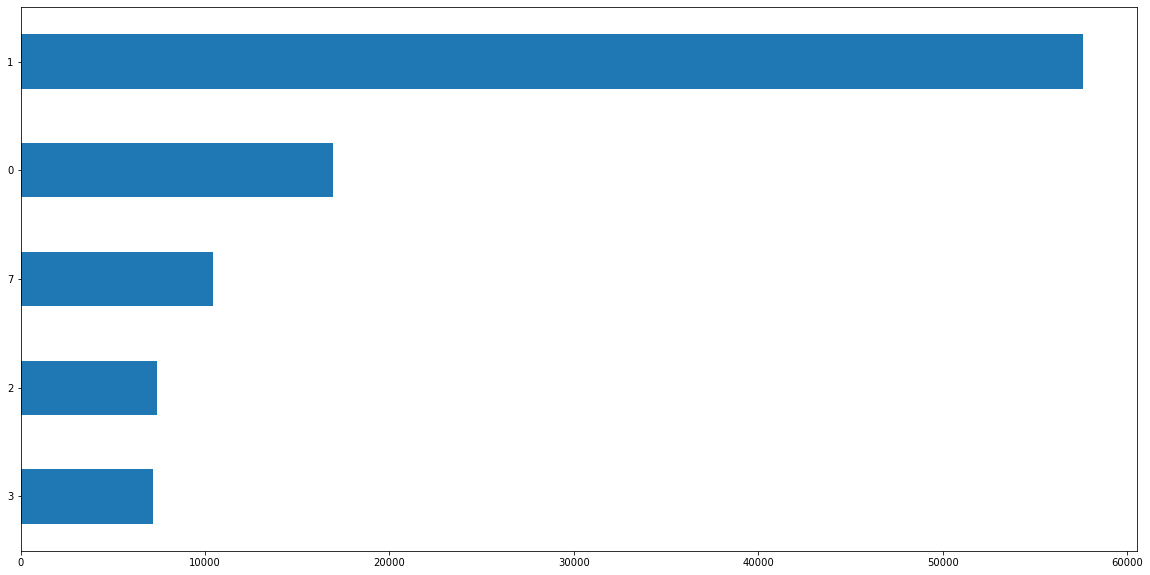

In [34]:
### The Top 5 Borrowing reasons
plt.figure(figsize=[20, 10])
loan.listingcategory.value_counts().sort_values(ascending = True).tail().plot(kind='barh');   

### Observation
 

### Overall Observation
 - Apart from the establishment that employed people actually need more loans, Like! we would have thought that, There was nothing out of the ordinary. All variables tend to appear as expected.
 - It would be interesting to see how borrowers perform in repayment.



## Bivariate Exploration

### Trend over the years

In [35]:
# create a year of loan column
loan['year'] = pd.DatetimeIndex(loan.loanoriginationdate).year

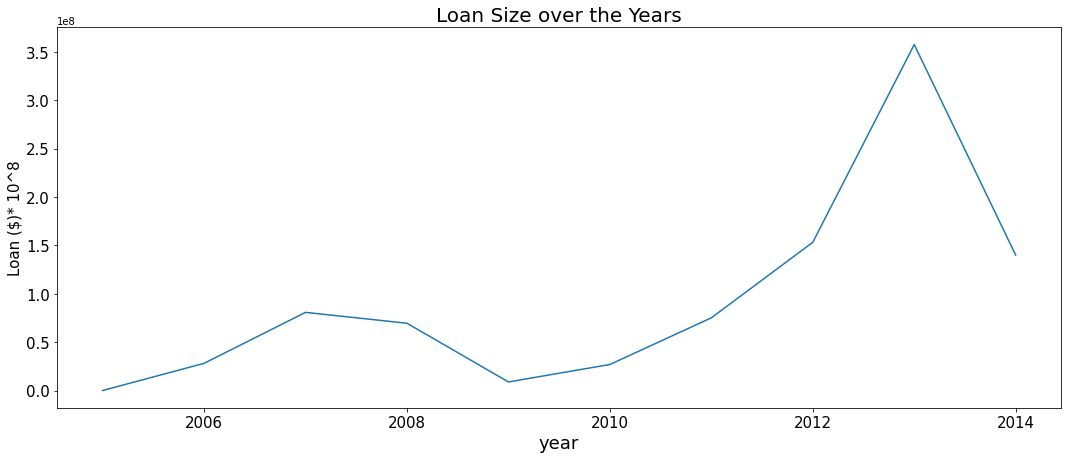

In [36]:
plt.figure(figsize=[18, 7])
plt.title('Loan Size over the Years',fontdict={'fontsize':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Loan ($)* 10^8', fontsize=15);
loan.groupby('year')['loanoriginalamount'].sum().plot(kind= 'line');

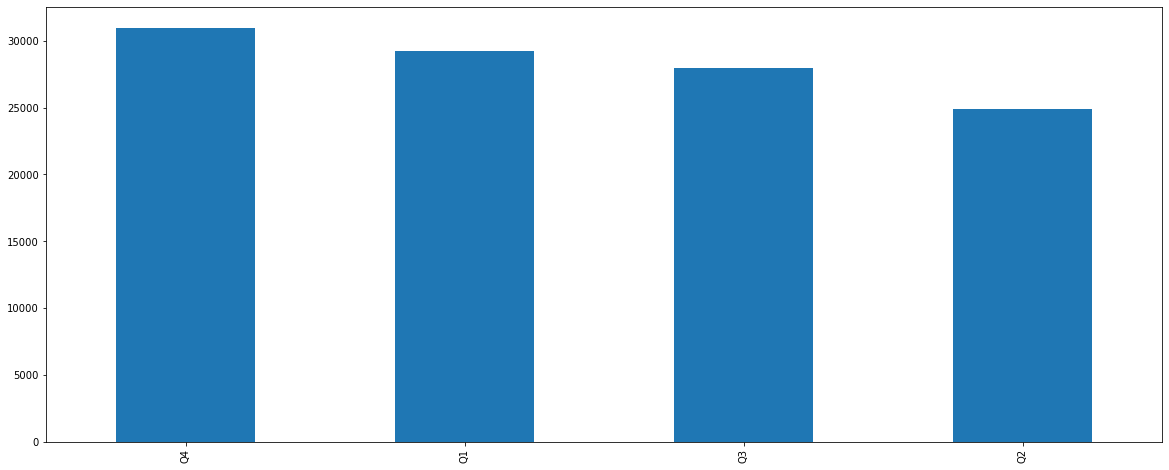

In [104]:
# Busiest quarter 
plt.figure(figsize=[20, 8])
loan.loanquarter.value_counts().sort_values(ascending = False).head().plot(kind='bar');   

### Observation
 - The loans over the years has grown with the peak year in 2013 and a plummet the following year.
 - Q4 and Q1 are the busiest period respectively.

### Investigating How the Rates are Fixed

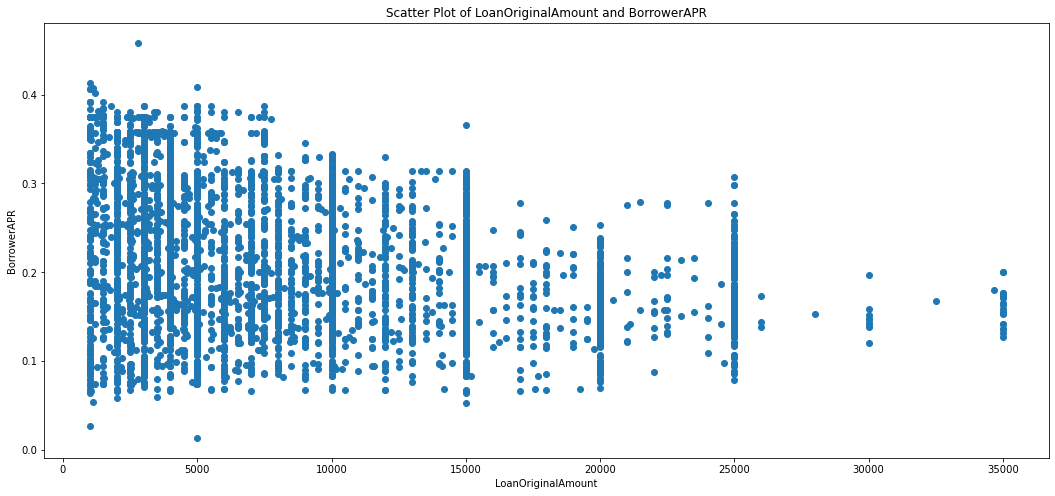

In [37]:
# Against loan size
plt.figure(figsize = [18, 8]) 
plt.scatter(data = loan.sample(5000), x = 'loanoriginalamount', y = 'borrowerapr',  alpha =  1.0) # sample is used to help render faster
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');

### Observation
 - This is a really interesting plot, there seems to be lesser disparity in the allocated borrower's rate with increasing loan size. We could almost see convergence towards the larger loan size.

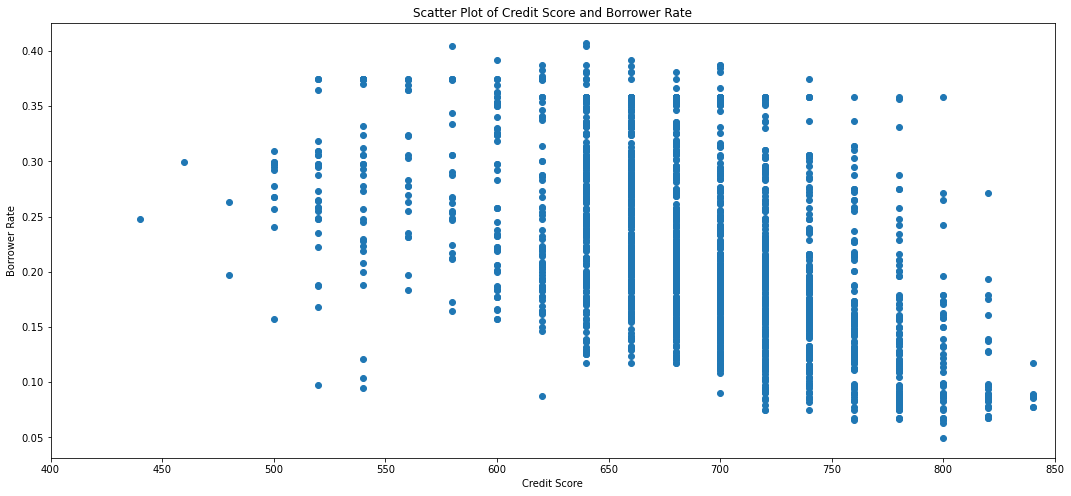

In [38]:
# Against Credit Score
plt.figure(figsize = [18, 8]) 
plt.scatter(data = loan.sample(2000), x = 'creditscorerangelower', y = 'borrowerapr',  alpha =  1.0)
plt.title('Scatter Plot of Credit Score and Borrower Rate')
plt.xlim([400,850])
plt.xlabel('Credit Score')
plt.ylabel('Borrower Rate');

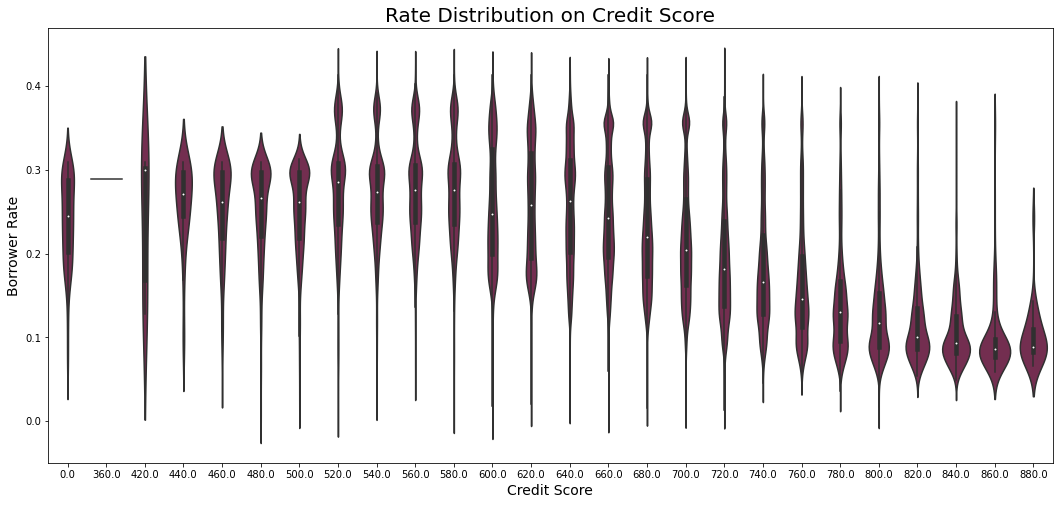

In [45]:
# Against credit score
plt.figure(figsize = [18, 8]) 
sb.violinplot(data=loan, x='creditscorerangelower', y='borrowerapr', color = base_color)
plt.xlabel('Credit Score', fontsize=14)
plt.title('Rate Distribution on Credit Score',fontdict={'fontsize':20})
plt.ylabel('Borrower Rate', fontsize=14);

### Observation
 - Borrowers with better credit scores seems to get better annual rate.

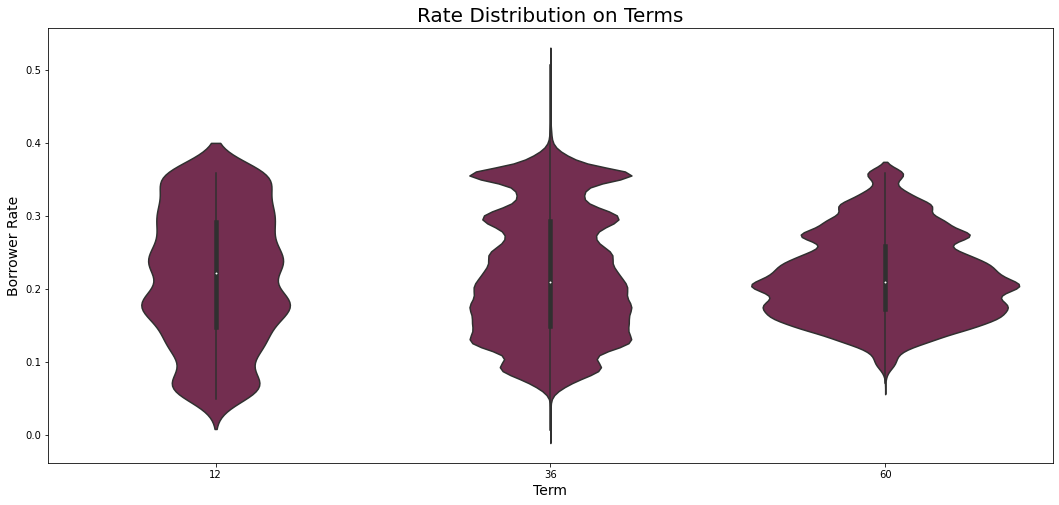

In [103]:
# Against terms of loan
plt.figure(figsize = [18, 8]) 
sb.violinplot(data=loan, x='term', y='borrowerapr', color = base_color)
plt.xlabel('Term', fontsize=14)
plt.title('Rate Distribution on Terms',fontdict={'fontsize':20})
plt.ylabel('Borrower Rate', fontsize=14);

### Observation
 - The loans on 12-month term has its rate evenly spread out, 36-month term has more around the `0.1` mark and the 60-month term has a lot of its loans around the `0.2` region. 

borrowerapr    0.21898
dtype: float64


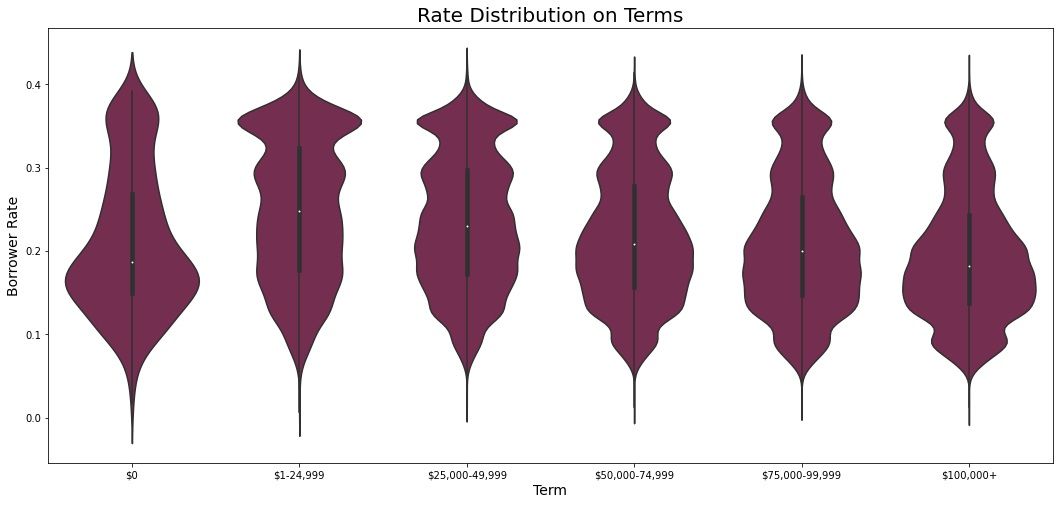

In [46]:
# Against Income range
plt.figure(figsize = [18, 8]) 
sb.violinplot(data=loan, x='incomerange', y='borrowerapr', color = base_color)
plt.xlabel('Term', fontsize=14)
plt.title('Rate Distribution on Terms',fontdict={'fontsize':20})
plt.ylabel('Borrower Rate', fontsize=14);
print(loan[['borrowerapr']].mean())

### Observation
 - Like the mean value suggests, a lot loans are given out at around `0.2` as also shown in the plot above.

## Multivariate Visualisation

### Loan Defaulters
It will be interesting to see how borrowers repay their loans.

In [65]:
# creating a new column to indicate if a borrower defaulted in repaying a loan
loan['defaulted'] = np.where(loan['currentdelinquencies']> 0, True, False)

In [91]:
# Creating a function to plot defaulters across different categories.
def delplot(x, y, title):
    '''Just enter the variable x which should be categorical and y should be the hue'''
    loan.groupby([x,y]).size().unstack().plot(kind='bar', stacked=True, figsize=[15, 7], title= title,
    ylabel = 'Borrower\'s Count')

In [98]:
# Creating a function to plot defaulters across different categories but this time in proportion of 100
def proplot(x, y, title):
    '''Just enter the variable x which should be categorical and y should be the hue'''
    loan.groupby(x)[y].value_counts(normalize= True).mul(100).unstack().plot(kind= 'bar', stacked = True,  width= .9, 
    figsize=(15,7), rot=90, title= title, ylabel='Defaulter\'s proportion');

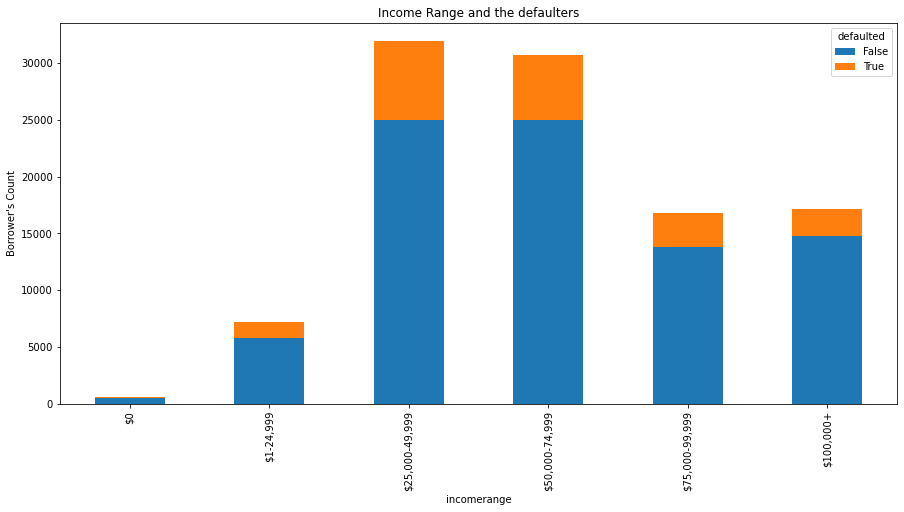

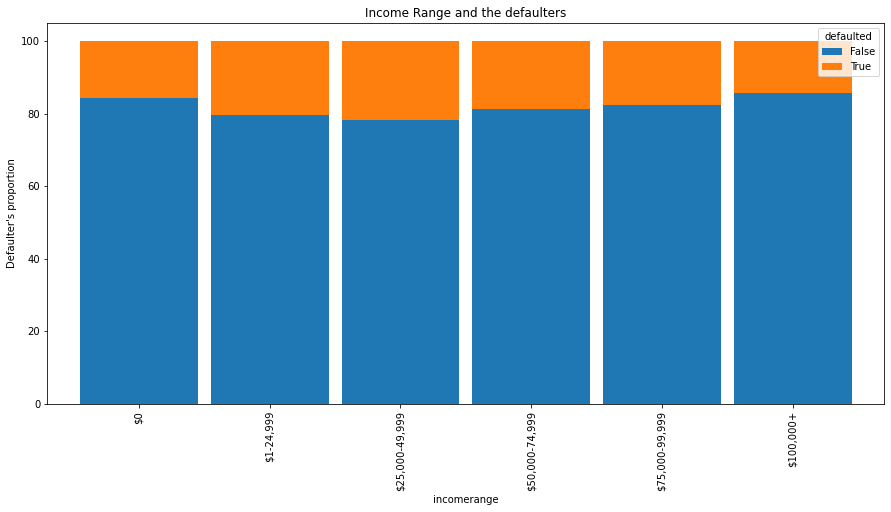

In [99]:
# Across income range
delplot('incomerange','defaulted','Income Range and the defaulters')
proplot('incomerange','defaulted','Income Range and the defaulters')

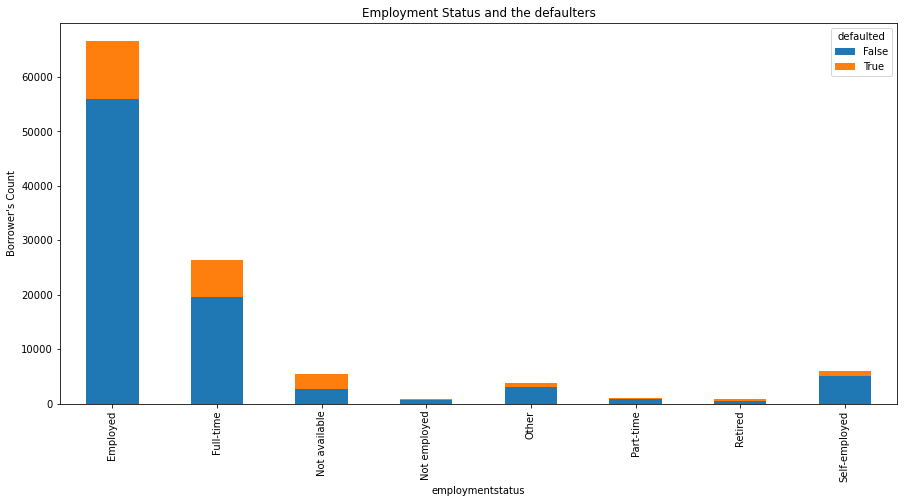

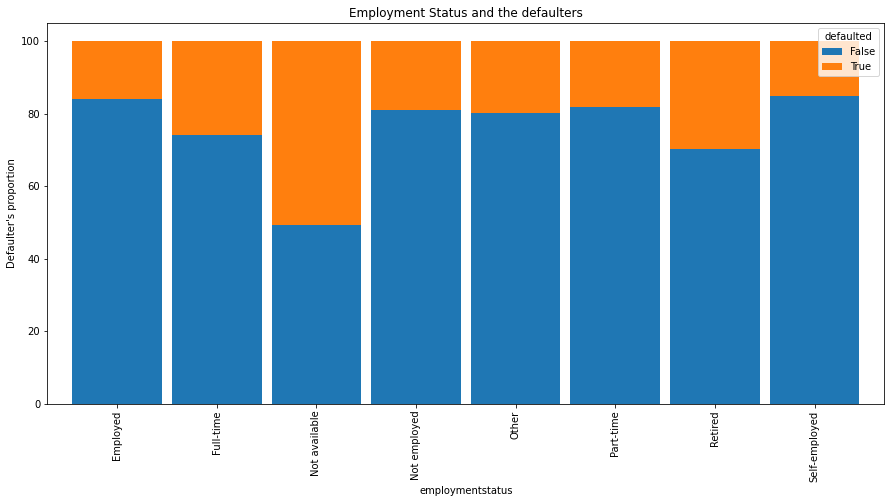

In [100]:
delplot('employmentstatus', 'defaulted', 'Employment Status and the defaulters')
proplot('employmentstatus', 'defaulted', 'Employment Status and the defaulters')

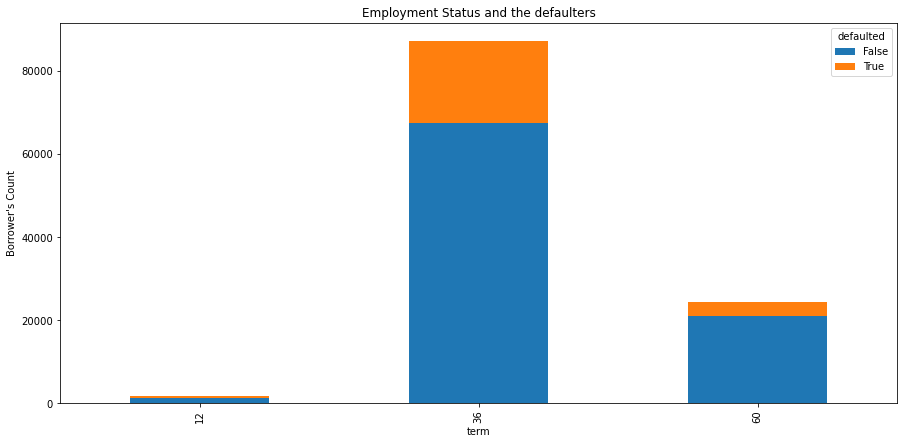

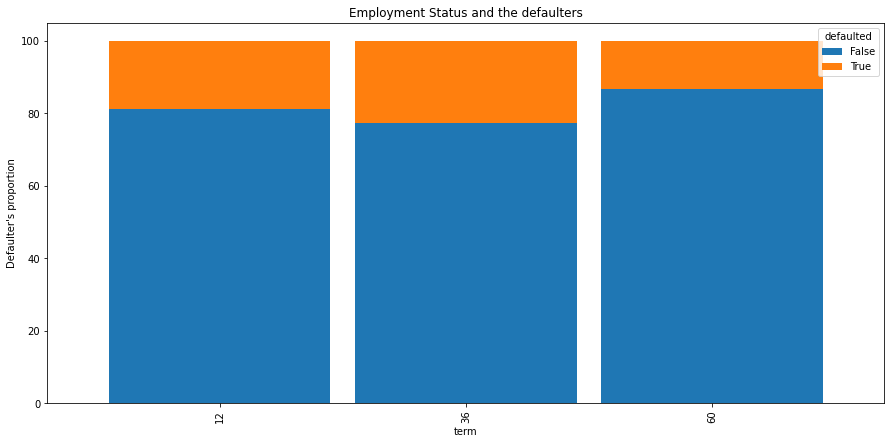

In [101]:
delplot('term', 'defaulted', 'Employment Status and the defaulters')
proplot('term', 'defaulted', 'Employment Status and the defaulters')

### Observation 
 - Borrowers who didn't disclose their employment status tend default in their loan repayment.

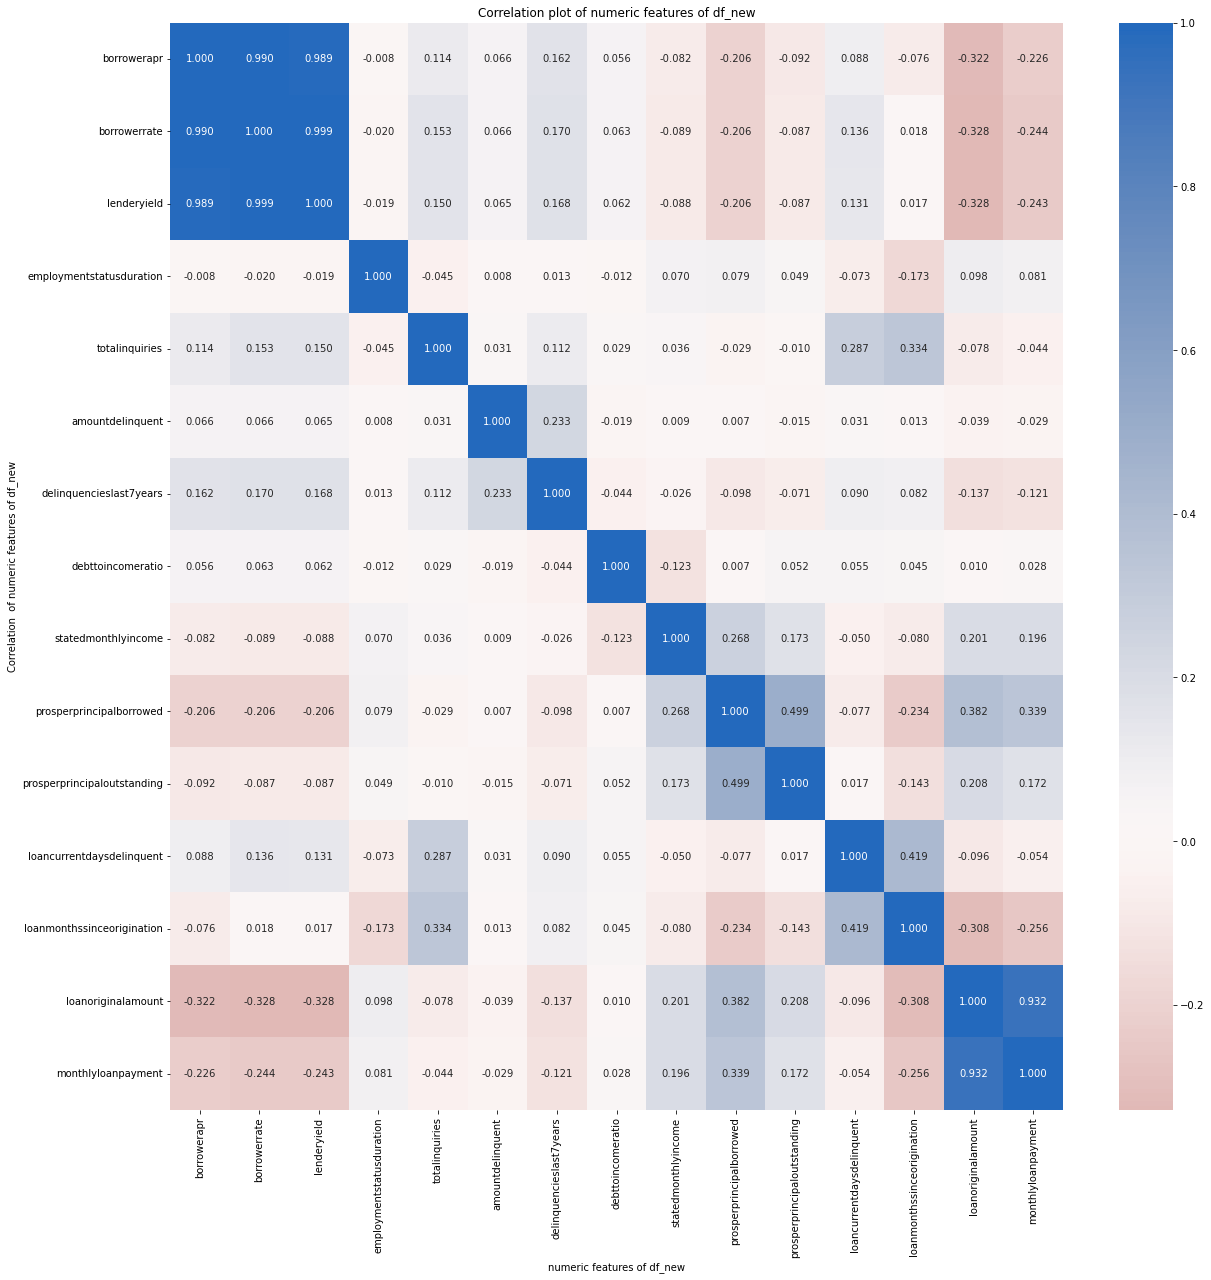

In [47]:
# correlation plot for numerical variables 
numerical_var= loan.loc[:, loan.nunique() > 50] # This is factor out only numerical variables
plt.figure(figsize = [20, 20])
sb.heatmap(numerical_var.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.ylabel('Correlation  of numeric features of df_new');
plt.title("Correlation plot of numeric features of df_new")
plt.xlabel('numeric features of df_new')
plt.show();

### Observation 
 - As expected, the correlation arround the borrow rate and apr is so strong.

## Conclusions
 - Loans shouldn't be given out to those with no known employment status
 - Maintaining a good credit score gives you a better APR
 - Q4 is the busiest period.
 - California and Texas are highest borrowing states.